Epoch 1/10


100%|██████████| 56000/56000 [00:02<00:00, 20927.41it/s, train_loss=0.5495, val_loss=0.3013]


Epoch 2/10


100%|██████████| 56000/56000 [00:03<00:00, 18320.82it/s, train_loss=0.2555, val_loss=0.2409]


Epoch 3/10


100%|██████████| 56000/56000 [00:03<00:00, 18323.17it/s, train_loss=0.2051, val_loss=0.2172]


Epoch 4/10


100%|██████████| 56000/56000 [00:02<00:00, 22028.66it/s, train_loss=0.1761, val_loss=0.2020]


Epoch 5/10


100%|██████████| 56000/56000 [00:02<00:00, 18831.98it/s, train_loss=0.1567, val_loss=0.1953]


Epoch 6/10


100%|██████████| 56000/56000 [00:02<00:00, 21021.42it/s, train_loss=0.1421, val_loss=0.1852]


Epoch 7/10


100%|██████████| 56000/56000 [00:02<00:00, 20696.93it/s, train_loss=0.1297, val_loss=0.1820]


Epoch 8/10


100%|██████████| 56000/56000 [00:02<00:00, 19049.18it/s, train_loss=0.1196, val_loss=0.1788]


Epoch 9/10


100%|██████████| 56000/56000 [00:02<00:00, 22067.64it/s, train_loss=0.1114, val_loss=0.1752]


Epoch 10/10


100%|██████████| 56000/56000 [00:02<00:00, 22262.48it/s, train_loss=0.1037, val_loss=0.1730]


Test accuracy: 0.9531


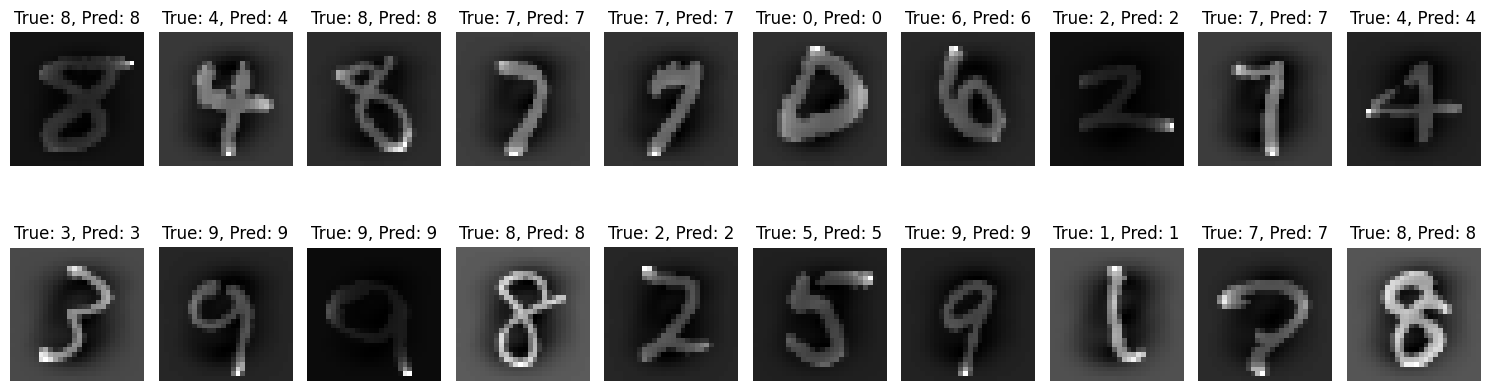

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from activation import ReLU, Softmax
from loss import CategoricalCrossEntropy
from initialization import XavierInitialization, HeInitialization
from model import FFNN

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Label butuh di-encode dengan One Hot
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

layer_sizes = [784, 32, 16, 10] # Fitur input ada 784

activations = [
    ReLU(),
    ReLU(), 
    Softmax()     
]

loss_function = CategoricalCrossEntropy()

initializations = [
    HeInitialization(seed=42),  
    XavierInitialization(seed=42),  
    HeInitialization(seed=42)   
]

model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss=loss_function,
    initializations=initializations
)

history = model.train(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    x_y_val=(X_test, y_test),
    verbose=1
)

# plot loss
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

model.plot_model()

model.plot_weight_distribution()

model.plot_gradient_distribution()

# prediksi
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_classes == y_true_classes)
print(f"Test accuracy: {accuracy:.4f}")

# # Visualize 20 predictions
# plt.figure(figsize=(15, 5))
# for i in range(20):
#     plt.subplot(2, 10, i+1)
#     plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
#     plt.title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
#     plt.axis('off')
# plt.tight_layout()
# plt.show()

Iteration 1, loss = 0.48979474
Iteration 2, loss = 0.26464583
Iteration 3, loss = 0.23233831
Iteration 4, loss = 0.21404881
Iteration 5, loss = 0.20279093
Iteration 6, loss = 0.19424657
Iteration 7, loss = 0.18801248
Iteration 8, loss = 0.18182793
Iteration 9, loss = 0.17829691
Iteration 10, loss = 0.17295623
Accuracy: 0.9321
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.97      0.96      0.97      1600
           2       0.92      0.93      0.93      1380
           3       0.93      0.89      0.91      1433
           4       0.94      0.93      0.93      1295
           5       0.90      0.92      0.91      1273
           6       0.96      0.96      0.96      1396
           7       0.93      0.95      0.94      1503
           8       0.90      0.90      0.90      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.93     14000
   macro avg       0.9

c:\Users\Naufal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


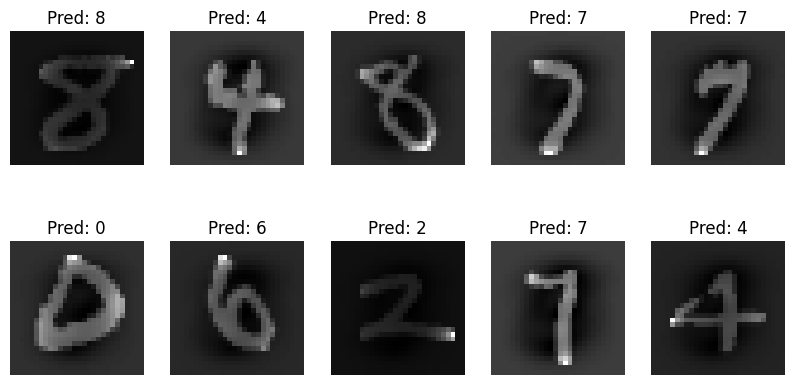

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# fetch ulang MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype(np.float32), mnist.target.astype(np.int64)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10), 
    activation='relu', 
    solver='adam',
    batch_size=16, 
    max_iter=10, 
    random_state=42, 
    verbose=True)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
#     ax.set_title(f'Pred: {y_pred[i]}')
#     ax.axis('off')
# plt.show()
